В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: API для данных о футбольных матчах и командах.

Используя kmeans сделать кластеризацию футбольных команд по среднему возрасту игроков команды и количеству проигрышей, результат отобразить в виде точечного графика для случая из 3, 4, 5 кластеров.


In [64]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2
from pprint import pprint
import datetime
import math
import operator
%matplotlib inline

In [65]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers={'X-Auth-Token': '156809c82dae43b2b24c75429b9140ed'}).json()
        return json[result_key]
    except:
        print(json)
        return None

In [90]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')

In [67]:
def get_age(birth_raw):
    now = datetime.datetime.today()
    birth = datetime.datetime.strptime(birth_raw, '%Y-%m-%d')
    age_raw = now - birth
    age = age_raw.days / 365
    return age

In [68]:
def lose_or_not(goals_away, relate, goals_home):
    if goals_away == goals_home:
        return 0
    elif relate(goals_away, goals_home):
        return 1
    else:
        return 0

In [91]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    
    age_list = []
    for player in players:
        age = get_age(player['dateOfBirth'])
        age_list.append(age)
    average_age = sum(age_list) / len(age_list)
    
    loses = 0
    for f in fixtures:
        goals_away = f['result']['goalsAwayTeam']
        goals_home = f['result']['goalsHomeTeam']
        if team['name'] == f['homeTeamName']:
            loses += lose_or_not(goals_away, operator.gt, goals_home)
        else:
            loses += lose_or_not(goals_away, operator.lt, goals_home)
            
    print(f"Team \"{team['name']}\", {int(average_age)} average age, {loses} loses")
    team['average_age'] = average_age
    team['loses'] = loses

Team "FC Rio Ave", 25 average age, 4 loses
Team "FC Porto", 27 average age, 2 loses
Team "Moreirense FC", 24 average age, 6 loses
Team "FC Paços de Ferreira", 26 average age, 5 loses
Team "Sporting CP", 26 average age, 2 loses
Team "Maritimo Funchal", 26 average age, 3 loses
Team "CD Tondela", 26 average age, 5 loses
Team "SL Benfica", 26 average age, 5 loses
Team "Boavista Porto FC", 25 average age, 6 loses
Team "FC Arouca", 27 average age, 0 loses
Team "Vitoria Setubal", 25 average age, 5 loses
Team "C.F. Os Belenenses", 27 average age, 5 loses
Team "Vitoria Guimaraes", 25 average age, 5 loses
Team "Sporting Braga", 24 average age, 3 loses
Team "GD Estoril Praia", 24 average age, 9 loses
Team "Feirense", 25 average age, 6 loses
Team "Nacional Funchal", 26 average age, 0 loses
Team "G.D. Chaves", 27 average age, 6 loses


In [77]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'average_age': team['average_age'], 'loses': team['loses']})
team_for_pd

[{'average_age': 25.520446473871136, 'loses': 4, 'name': 'FC Rio Ave'},
 {'average_age': 27.04394520547944, 'loses': 2, 'name': 'FC Porto'},
 {'average_age': 24.962524461839536, 'loses': 6, 'name': 'Moreirense FC'},
 {'average_age': 26.494731296101158,
  'loses': 5,
  'name': 'FC Paços de Ferreira'},
 {'average_age': 26.272349061390166, 'loses': 2, 'name': 'Sporting CP'},
 {'average_age': 26.410014170996696, 'loses': 3, 'name': 'Maritimo Funchal'},
 {'average_age': 26.03074581430745, 'loses': 5, 'name': 'CD Tondela'},
 {'average_age': 26.23411400795405, 'loses': 5, 'name': 'SL Benfica'},
 {'average_age': 25.557052943354318, 'loses': 6, 'name': 'Boavista Porto FC'},
 {'average_age': 27.56973848069739, 'loses': 0, 'name': 'FC Arouca'},
 {'average_age': 25.86707255200406, 'loses': 5, 'name': 'Vitoria Setubal'},
 {'average_age': 27.075342465753426, 'loses': 5, 'name': 'C.F. Os Belenenses'},
 {'average_age': 25.359013698630136, 'loses': 5, 'name': 'Vitoria Guimaraes'},
 {'average_age': 24.8

In [78]:
teams_pd = pd.DataFrame(team_for_pd)
del teams_pd['name']
teams_pd

,average_age,loses
0,25.520446,4
1,27.043945,2
2,24.962524,6
3,26.494731,5
4,26.272349,2
5,26.410014,3
6,26.030746,5
7,26.234114,5
8,25.557053,6
9,27.569738,0


In [79]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 30.32712814,   1.81307867],
       [ 32.13757222,   0.90653934],
       [ 29.66412358,   2.71961801],
       [ 31.4849159 ,   2.26634834],
       [ 31.22064879,   0.90653934],
       [ 31.38424262,   1.35980901],
       [ 30.93354047,   2.26634834],
       [ 31.17521231,   2.26634834],
       [ 30.3706293 ,   2.71961801],
       [ 32.76239671,   0.        ],
       [ 30.73903995,   2.26634834],
       [ 32.17488304,   2.26634834],
       [ 30.1352901 ,   2.26634834],
       [ 29.57307154,   1.35980901],
       [ 28.94855771,   4.07942702],
       [ 30.81033366,   2.71961801],
       [ 31.49515619,   0.        ],
       [ 32.33565164,   2.71961801]])

5 кластеров

In [81]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 30.64159628,   2.33110115],
        [ 32.76239671,   0.        ],
        [ 29.39525094,   2.71961801],
        [ 31.99848352,   2.41743823],
        [ 31.55940495,   0.79322192]]),
 array([0, 4, 2, 3, 4, 4, 0, 0, 0, 1, 0, 3, 0, 2, 2, 0, 4, 3]))

In [82]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

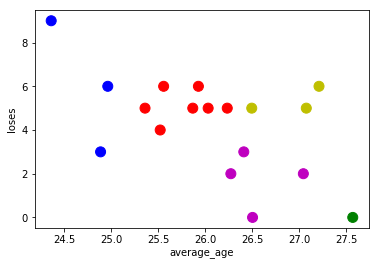

In [83]:
teams_pd.plot.scatter(x='average_age', y='loses', c=colors, s=100)

3 кластера

In [84]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 31.80000331,   0.63457754],
        [ 30.91451782,   2.26634834],
        [ 29.30634065,   3.39952251]]),
 array([1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1]))

In [85]:
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]

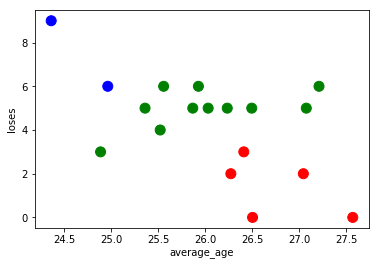

In [86]:
teams_pd.plot.scatter(x='average_age', y='loses', c=colors, s=100)

4 кластера

In [87]:
centroids, cluster_map = kmeans2(whitened, 4)
centroids, cluster_map

(array([[ 31.55940495,   0.79322192],
        [ 32.76239671,   0.        ],
        [ 31.79266572,   2.37966576],
        [ 30.16685716,   2.46780153]]),
 array([3, 0, 3, 2, 0, 0, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 0, 2]))

In [88]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y'}
colors = [colors_map[c] for c in cluster_map]

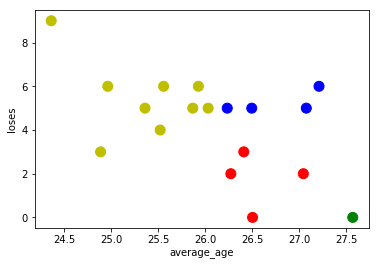

In [89]:
teams_pd.plot.scatter(x='average_age', y='loses', c=colors, s=100)